In [3]:
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.callbacks import History

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


### Load data

In [4]:
# Load the dataset
def readFile(name):
    """Import data from csv file"""
    df = pd.read_csv(name, delim_whitespace=True, header=None,
                     names=['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'name'],
                     usecols=['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
    return df

monk1_train = readFile('https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-1.train')
monk1_test = readFile('https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-1.test')
monk2_train = readFile('https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-2.train')
monk2_test = readFile('https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-2.test')
monk3_train = readFile('https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-3.train')
monk3_test = readFile('https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-3.test')

X = monk1_train[['a1', 'a2', 'a3', 'a4', 'a5', 'a6']]
y = monk1_train['class']

X_test = monk1_test[['a1', 'a2', 'a3', 'a4', 'a5', 'a6']]
y_test = monk1_test['class']

sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

### Build Keras model

In [0]:
#def build_model(params, input_dim):

In [0]:
def choose_model(X, y, X_val, y_val):
  best_model = Sequential()
  highest_score = 0
  
  # KFold
  seed = 42
  np.random.seed(seed)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
  
  cvscores = []
  # Outer CV
    
  for train, test in kfold.split(X,y):

    epochs = 200
    
    # Calculate input dimension
    input_dim = X[train].shape[1]

    # Create model
    # TODO hyperparameter/model selection
    # build model -> inner CV
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    
    # create second model
    hidden_units = 8
    output_units = 1
    model2 = Sequential([
      Dense(output_dim=hidden_units, input_dim=input_dim, activation='relu'),
      Dense(output_dim=output_units, input_dim=hidden_units, activation='sigmoid')])
    model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


    # Train the model, iterating on the data in batches of 32 samples
    history1 = model.fit(X[train], y[train], epochs=epochs, verbose=0, validation_data=(X_val, y_val))
    history2 = model2.fit(X[train], y[train], epochs=epochs, verbose=0, validation_data=(X_val, y_val))
    
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    if (scores[1] > highest_score):
      best_model = model
  
  # Print cross-validated scores
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  
  return best_model, history, history2

### Evaluate the model and plot

In [0]:
def eval_model(model, X, y):
  cvscores = []
  
  # Train the model, iterating on the data in batches of 32 samples
  history = History()
  #model.fit(X, y, epochs=150, batch_size=1, verbose=0, callbacks=[history])

  # evaluate the model
  scores = model.evaluate(X, y, verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  
  # Print cross-validated scores
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  
  return np.mean(cvscores), np.std(cvscores)

In [0]:
def plot_history(history):
  loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
  val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
  acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
  val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

  if len(loss_list) == 0:
      print('Loss is missing in history')
      return 

  ## As loss always exists
  epochs = range(1,len(history.history[loss_list[0]]) + 1)

  ## Loss
  plt.figure(1)
  for l in loss_list:
      plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
  for l in val_loss_list:
      plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'), linestyle = '--',)

  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  ## Accuracy
  plt.figure(2)
  for l in acc_list:
      plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
  for l in val_acc_list:    
      plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')', linestyle = '--',)

  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

### Apply model

acc: 69.23%
acc: 88.46%
acc: 83.33%
acc: 91.67%
acc: 83.33%
83.21% (+/- 7.68%)


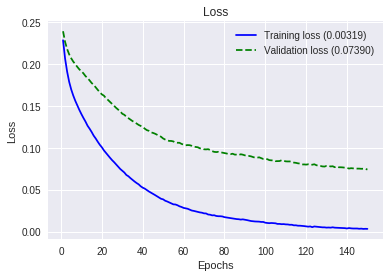

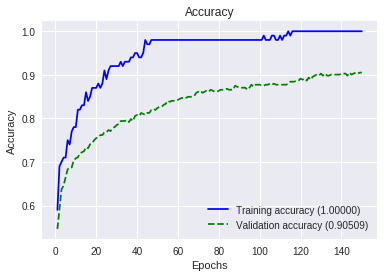

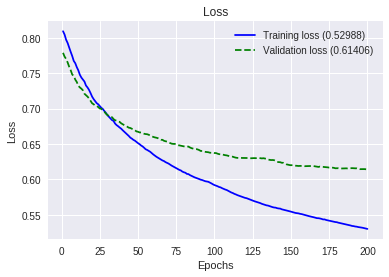

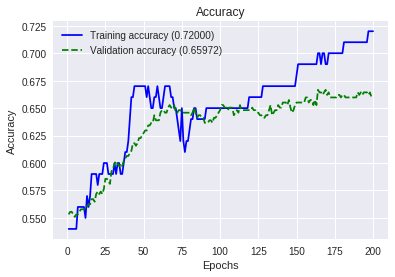

In [35]:
best_model, history1, history2 = choose_model(X, y, X_test, y_test)

# Test model
# eval_model(best_model, X_test, y_test)
plot_history(history1)
plot_history(history2)